# Data Exploration and Preprocessing, Encoding Techniques:

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'adult_with_headers.csv', header=0) # upload dataset

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.isnull().sum()  # no null value

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [7]:
data.shape

(32561, 15)

In [8]:
for i in data.columns:   # i can be any column like age, workclass, ...etc
    print(i,':' ,  data[i].unique())

age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : [ 77516  83311 215646 ...  34066  84661 257302]
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education_num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital_status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishin

we can see '?' in the dataset which shows a null value. So, first let's replace '?' with nan

In [9]:
import numpy as np
data = data.replace(' ?',np.nan)

In [10]:
data.isnull().sum() # there are null values in our dataset

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [11]:
data.shape

(32561, 15)

In [12]:
data[data.duplicated()]  # print duplicated rows 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,NaN,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [13]:
data = data.drop_duplicates()  # remove duplicated rows 

In [14]:
data[data.duplicated()]  # there is no duplicated row now

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


# Treat Null values using Imputation technique

Imputation technique is used for replacing the missing data with some substitute values to retain most of the data/information of the dataset. These substitute values can be either mean, median or mode. Here, we can use mode value to treat null values in columns: workclass, occupation and native_country 

In [15]:
data['workclass'].mode() # mode value

0     Private
Name: workclass, dtype: object

In [16]:
data['occupation'].mode() # mode value

0     Prof-specialty
Name: occupation, dtype: object

In [17]:
data['native_country'].mode() # mode value

0     United-States
Name: native_country, dtype: object

In [18]:
for value in ['workclass','occupation','native_country']:  # value can be any column:- workclass, occupation, native_country
    data[value].fillna(data[value].mode()[0], inplace = True)

In [19]:
data.isnull().sum()  # there is no null value

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Treat outliers(if any) using boxplot

In [20]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [21]:
import matplotlib.pyplot as plt #boxplot function is available in this lib 

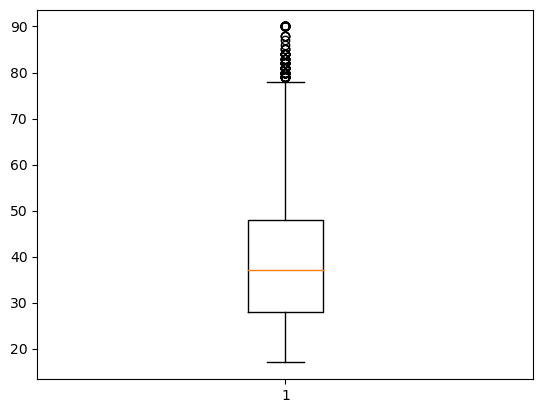

In [22]:
plt.boxplot(data['age']) #plot boxplot for age column
plt.show()

Range of age: 0-90. IQR(Inter Quartile Range) = 50-30 = 20 (approx). Range from 80-90 is very dense, so, we should not consider them as outliers else we may lose some valuable information from the dataset.

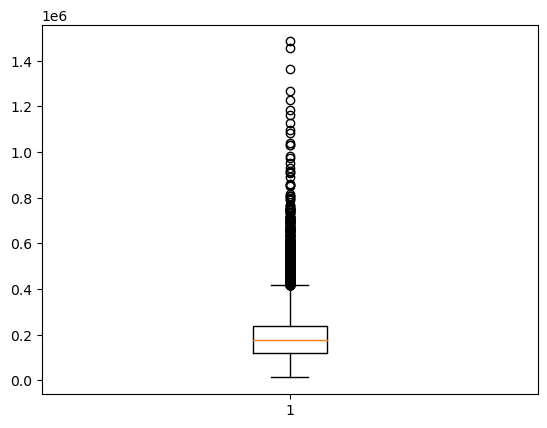

In [23]:
plt.boxplot(data['fnlwgt'])
plt.show()

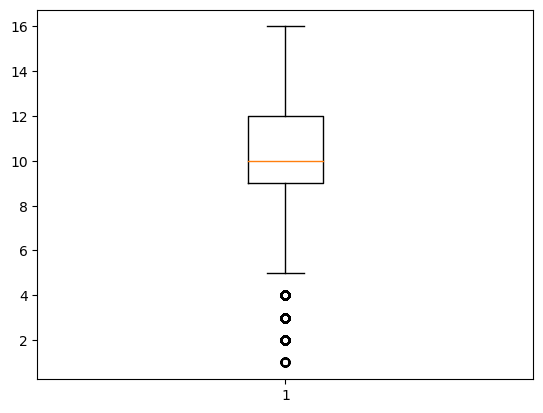

In [24]:
plt.boxplot(data['education_num'])
plt.show()

as per dataset, education_num can be anything from 1 to 16, so, no outliers

In [25]:
data['education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

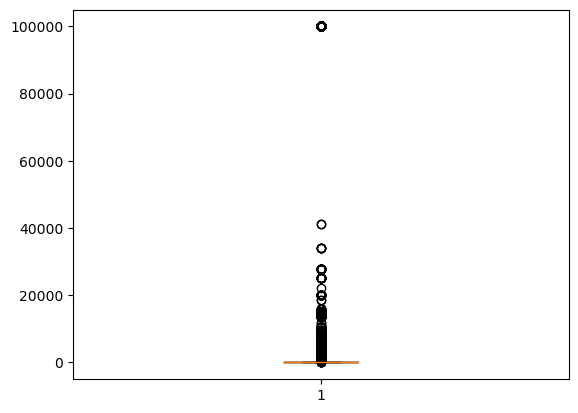

In [26]:
plt.boxplot(data['capital_gain'])
plt.show()

# Treat outlier in column capital_gain

In [27]:
data.drop(data[data['capital_gain'] > 80000].index,axis=0,inplace=True) # remove one outlier above 80000

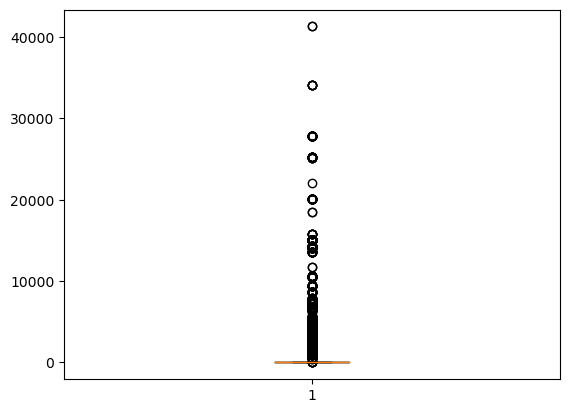

In [28]:
plt.boxplot(data['capital_gain']) # one outlier has been removed now
plt.show()

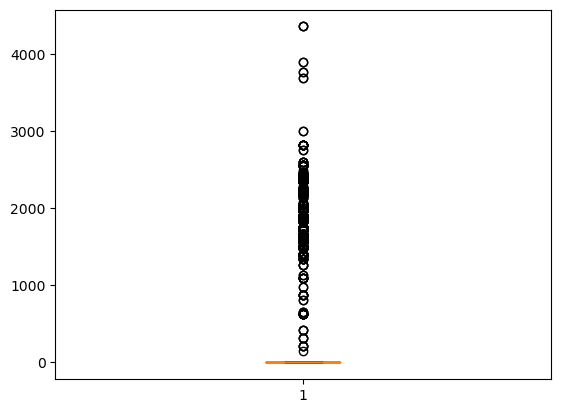

In [29]:
plt.boxplot(data['capital_loss'])
plt.show()

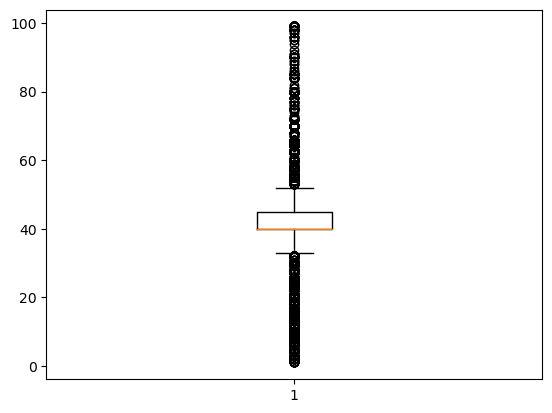

In [30]:
plt.boxplot(data['hours_per_week'])
plt.show()

# Encode categorical variables

In [31]:
data.columns # shows all columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [32]:
colname =[] # blank list for storing all categorical features in the dataset
for x in data.columns:  # x can be any column 
    if data[x].dtypes=='object':  # compare data type of each column with object
        colname.append(x)  # if above condition satisfied, append that column to the colname list
        
colname   # finally all categorical columns in our dataset will be stored in this list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [33]:
from sklearn.preprocessing import LabelEncoder  # import LabelEncoder function from sublib. preprocessing
le = LabelEncoder()  # save this function in var. le
for x in colname: # x can be any column
    data[x] = le.fit_transform(data[x]) # it will tranform each categorical column into numeric column using LabelEncoder func
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))  # representation in dictionary format 
    print('Feature',x)
    print('mapping', le_name_mapping)

Feature workclass
mapping {' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}
Feature education
mapping {' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}
Feature marital_status
mapping {' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
Feature occupation
mapping {' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
Feature relationship
mappin

In [34]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


# correlation matrices
Let's apply heatmap over this data to get the value of correlation between two variables

In [35]:
import seaborn as sns

<AxesSubplot:>

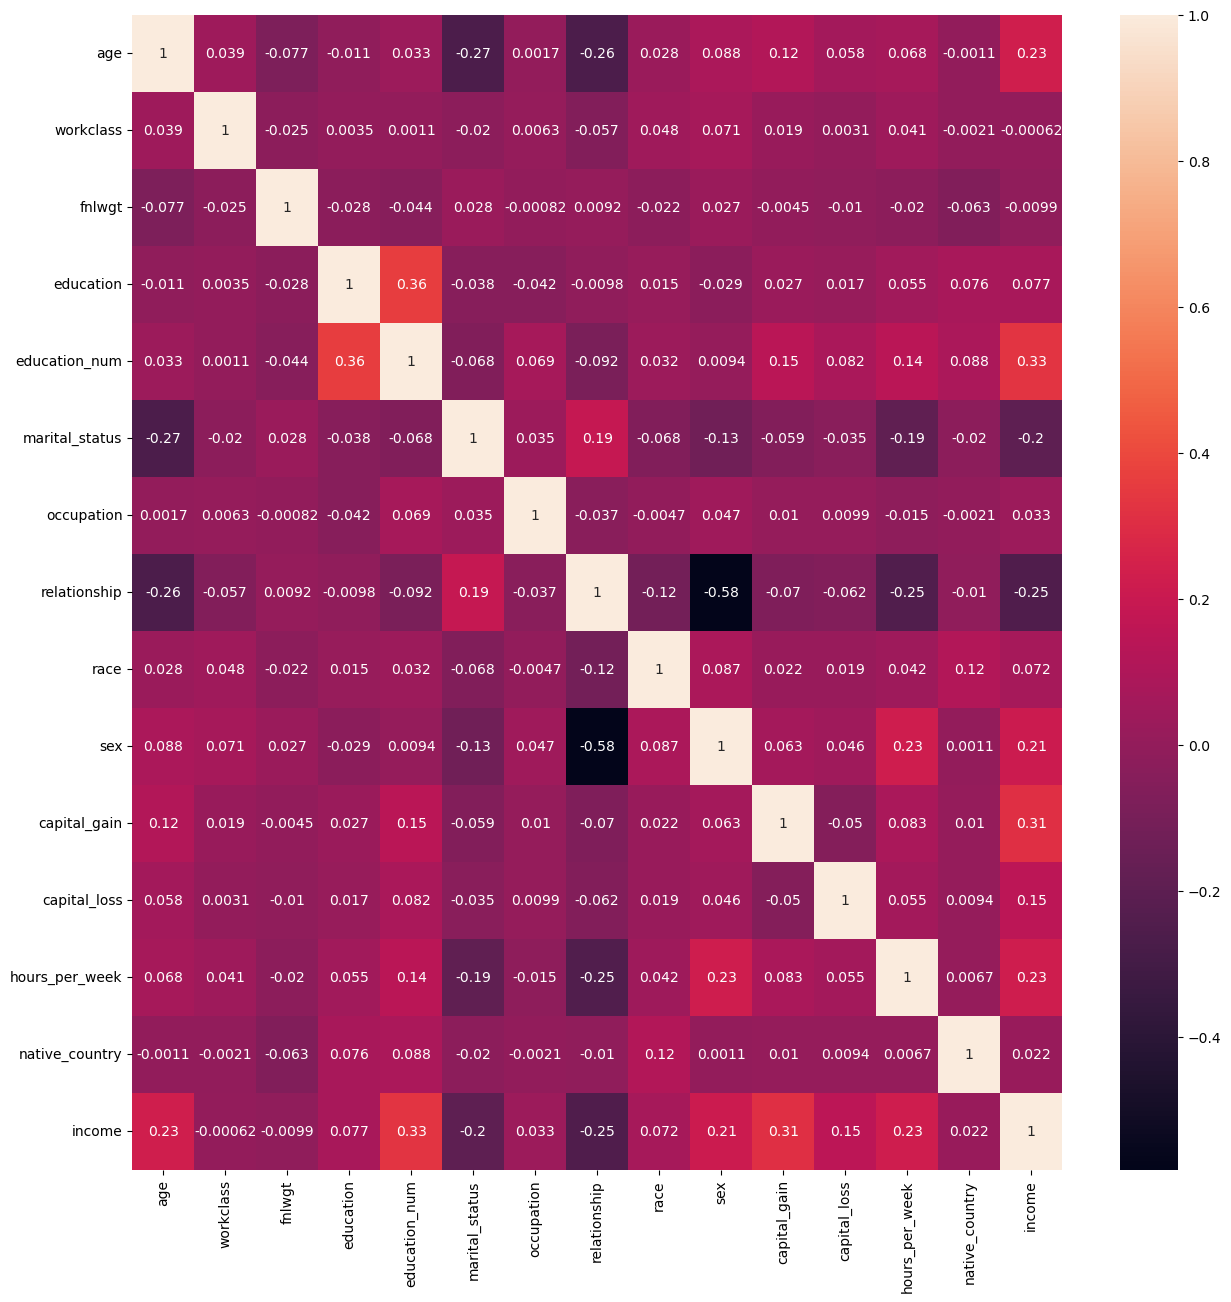

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))  #specify size of heatmap
sns.heatmap(data.corr(),annot=True) #create heatmap (parameter annot is used to display the correlation values, bidefault it is False, so, we have to pass True)

education_num is the most contributing element in deciding the target variable income 

# Train the model using Logistic Regression algorithm and then Apply Function Transformation (Log Transformation) & Power Transformation (Box-Cox Transformation) to improve the model performance

In [37]:
X = data.iloc[:,:-1]
Y = data['income']

In [38]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [39]:
Y 

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32378, dtype: int32

# data scaling 

In [40]:
#from scipy import stats     # no data scaling is required as log transformation applied on positive numbers only 
#X = X.apply(stats.zscore)

In [41]:
from sklearn.model_selection import train_test_split # import train_test_split func from model_selection sublib.
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10) # training and testing data (model can randomly take 10 rows at a time)

In [42]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
25706,24,3,209034,7,12,2,11,3,4,0,0,0,20,38
20175,27,3,199314,9,13,4,0,1,4,1,0,0,40,30
7486,24,1,184678,9,13,4,9,1,4,0,0,0,40,38
6027,25,1,169905,15,10,2,4,0,4,1,0,0,40,38
375,20,1,350845,15,10,4,0,3,4,0,0,0,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28177,28,6,239130,15,10,0,7,4,4,1,0,0,40,38
17820,54,5,199741,11,9,6,2,1,4,1,0,2001,35,38
29368,49,0,233059,8,11,2,2,0,4,1,0,0,40,38
7327,53,6,104501,10,16,2,9,0,4,1,0,0,40,38


In [43]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(25902, 14)
(6476, 14)
(25902,)
(6476,)


In [44]:
# train the model using LogisticRegression algorithm (just for example)
from sklearn.linear_model import LogisticRegression # import LogisticRegression function from linear_model sublib.
classifier = LogisticRegression()   # save this function in a variable classifier
classifier.fit(X_train,Y_train)   # fit function will train the model 


LogisticRegression()

In [45]:
classifier.score(X_train,Y_train), classifier.score(X_test,Y_test)  # training accuracy, testing accuracy

(0.7918307466604896, 0.7787214329833231)

# plot the probability density function (pdf) for "capital_gain" column

C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\2542542261.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['capital_gain'])


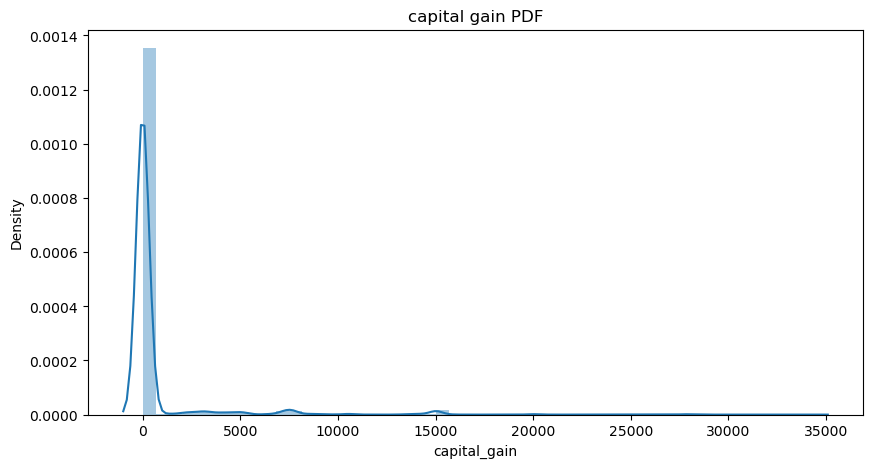

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(X_train['capital_gain'])
plt.title("capital gain PDF")
plt.show()

we can observe right-skewed data

# Transform our dataset using Log transformation and again train , evaluate the model

In [47]:
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
trf

FunctionTransformer(func=<ufunc 'log1p'>)

In [48]:
X_train_transformed = trf.fit_transform(X_train) # since all columns of X_train are right skewed

In [49]:
X_train_transformed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
25706,3.218876,1.386294,12.250257,2.079442,2.564949,1.098612,2.484907,1.386294,1.609438,0.000000,0.0,0.000000,3.044522,3.663562
20175,3.332205,1.386294,12.202642,2.302585,2.639057,1.609438,0.000000,0.693147,1.609438,0.693147,0.0,0.000000,3.713572,3.433987
7486,3.218876,0.693147,12.126374,2.302585,2.639057,1.609438,2.302585,0.693147,1.609438,0.000000,0.0,0.000000,3.713572,3.663562
6027,3.258097,0.693147,12.043001,2.772589,2.397895,1.098612,1.609438,0.000000,1.609438,0.693147,0.0,0.000000,3.713572,3.663562
375,3.044522,0.693147,12.768103,2.772589,2.397895,1.609438,0.000000,1.386294,1.609438,0.000000,0.0,0.000000,2.397895,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28177,3.367296,1.945910,12.384767,2.772589,2.397895,0.000000,2.079442,1.609438,1.609438,0.693147,0.0,0.000000,3.713572,3.663562
17820,4.007333,1.791759,12.204782,2.484907,2.302585,1.945910,1.098612,0.693147,1.609438,0.693147,0.0,7.601902,3.583519,3.663562
29368,3.912023,0.000000,12.359051,2.197225,2.484907,1.098612,1.098612,0.000000,1.609438,0.693147,0.0,0.000000,3.713572,3.663562
7327,3.988984,1.945910,11.556961,2.397895,2.833213,1.098612,2.302585,0.000000,1.609438,0.693147,0.0,0.000000,3.713572,3.663562


In [50]:
X_test_transformed = trf.transform(X_test) # since all columns of X_test are right skewed

In [51]:
X_test_transformed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
5788,3.332205,1.386294,12.641084,2.772589,2.397895,0.000000,2.302585,1.386294,1.098612,0.000000,0.000000,0.0,3.713572,3.663562
14991,3.688879,1.609438,12.725542,2.484907,2.302585,1.098612,1.386294,0.000000,1.609438,0.693147,8.040447,0.0,4.110874,3.663562
731,4.025352,1.386294,12.061590,2.772589,2.397895,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.0,3.713572,3.663562
11979,3.555348,1.386294,11.145507,2.484907,2.302585,1.098612,2.639057,0.000000,0.693147,0.693147,0.000000,0.0,3.713572,3.663562
25945,3.688879,0.693147,12.665341,2.564949,2.708050,1.609438,2.302585,0.693147,1.609438,0.000000,0.000000,0.0,4.025352,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12888,3.526361,1.791759,12.224821,2.197225,2.484907,1.098612,1.609438,0.000000,1.609438,0.693147,0.000000,0.0,4.143135,3.663562
18366,4.317488,1.791759,12.167405,2.708050,2.772589,0.000000,2.302585,1.098612,1.609438,0.693147,0.000000,0.0,3.713572,3.663562
12704,3.737670,0.000000,12.277644,2.564949,2.708050,1.098612,1.386294,0.000000,1.609438,0.693147,0.000000,0.0,4.110874,3.663562
23205,3.401197,1.945910,12.391469,2.484907,2.302585,1.098612,1.098612,0.000000,1.609438,0.693147,0.000000,0.0,3.713572,3.663562


In [52]:
classifier = LogisticRegression()   # save this function in a variable classifier
classifier.fit(X_train_transformed,Y_train)   # again train the model 

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
classifier.score(X_train_transformed,Y_train), classifier.score(X_test_transformed,Y_test)  # training accuracy, testing accuracy

(0.8266157053509382, 0.8187152563310686)

accuracy of the model has improved due to log transformation

# plot the probability density function (pdf) for "capital_gain" column

C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\2528727665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['capital_gain'])


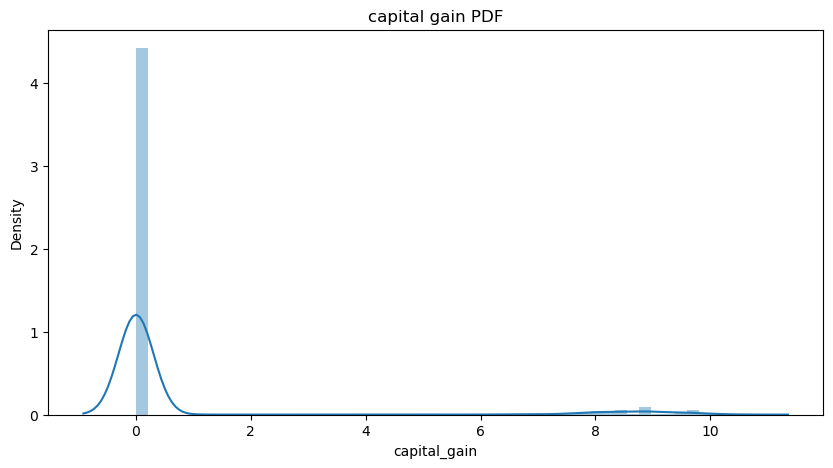

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(X_train_transformed['capital_gain'])
plt.title("capital gain PDF")
plt.show()

Now, the curve is very close to normal distribution

we can visualise the curves together

C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\1634332142.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['capital_gain'])
C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\1634332142.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['capital_gain'])


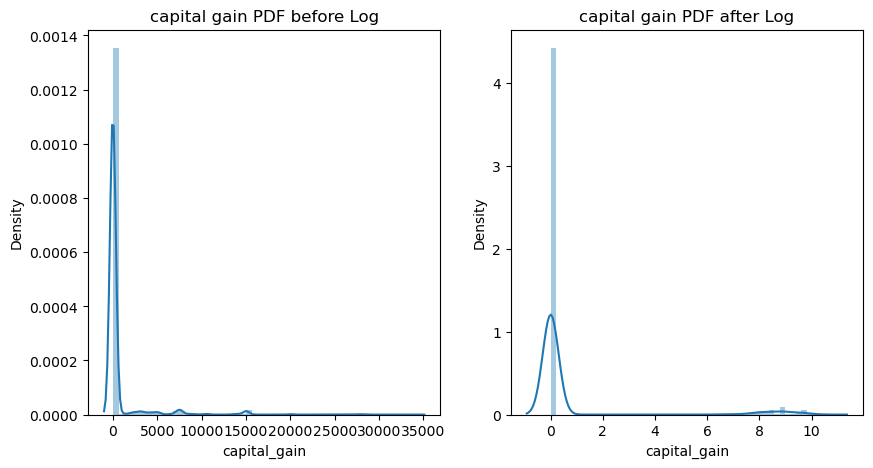

In [55]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['capital_gain'])
plt.title("capital gain PDF before Log")

plt.subplot(122)
sns.distplot(X_train_transformed['capital_gain'])
plt.title("capital gain PDF after Log")
plt.show()

# Apply the Box-Cox transformation and again train, evaluate the model

In [56]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method= 'box-cox')
pt

PowerTransformer(method='box-cox')

In [57]:
X_train_transformed = pt.fit_transform(X_train + 0.0000001)
X_test_transformed = pt.transform(X_test + 0.0000001)

In [58]:
X_train

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
25706,24,3,209034,7,12,2,11,3,4,0,0,0,20,38
20175,27,3,199314,9,13,4,0,1,4,1,0,0,40,30
7486,24,1,184678,9,13,4,9,1,4,0,0,0,40,38
6027,25,1,169905,15,10,2,4,0,4,1,0,0,40,38
375,20,1,350845,15,10,4,0,3,4,0,0,0,10,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28177,28,6,239130,15,10,0,7,4,4,1,0,0,40,38
17820,54,5,199741,11,9,6,2,1,4,1,0,2001,35,38
29368,49,0,233059,8,11,2,2,0,4,1,0,0,40,38
7327,53,6,104501,10,16,2,9,0,4,1,0,0,40,38


In [59]:
X_train_transformed

array([[-1.12896643, -0.00941294,  0.33795315, ..., -0.22194299,
        -1.66070246,  0.29527492],
       [-0.81903081, -0.00941294,  0.24960598, ..., -0.22194299,
        -0.03235661, -3.11443878],
       [-1.12896643, -1.90169962,  0.11173603, ..., -0.22194299,
        -0.03235661,  0.29527492],
       ...,
       [ 0.84275408, -3.52070985,  0.54658686, ..., -0.22194299,
        -0.03235661,  0.29527492],
       [ 1.07369659,  2.20193319, -0.78888675, ..., -0.22194299,
        -0.03235661,  0.29527492],
       [ 1.01736876, -0.00941294, -0.99834603, ..., -0.22194299,
        -0.03235661,  0.29527492]])

In [60]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)   # it will transform X_train_transformed as a dataframe

In [61]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [62]:
X_train_transformed

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,-1.128966,-0.009413,0.337953,-0.730400,0.752235,0.030633,0.885769,0.895994,0.411996,-1.411026,-0.290909,-0.221943,-1.660702,0.295275
1,-0.819031,-0.009413,0.249606,-0.239619,1.179611,0.712251,-2.377224,0.678834,0.411996,0.708704,-0.290909,-0.221943,-0.032357,-3.114439
2,-1.128966,-1.901700,0.111736,-0.239619,1.179611,0.712251,0.669463,0.678834,0.411996,-1.411026,-0.290909,-0.221943,-0.032357,0.295275
3,-1.022213,-1.901700,-0.034000,1.096980,-0.068948,0.030633,-0.068313,-1.209989,0.411996,0.708704,-0.290909,-0.221943,-0.032357,0.295275
4,-1.597271,-1.901700,1.422385,1.096980,-0.068948,0.712251,-2.377224,0.895994,0.411996,-1.411026,-0.290909,-0.221943,-2.479289,0.295275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25897,-0.722137,2.201933,0.597314,1.096980,-0.068948,-2.357143,0.418641,0.955516,0.411996,0.708704,-0.290909,-0.221943,-0.032357,0.295275
25898,1.129140,1.511972,0.253539,0.224961,-0.461284,1.197734,-0.555805,0.678834,0.411996,0.708704,-0.290909,4.505662,-0.438676,0.295275
25899,0.842754,-3.520710,0.546587,-0.481247,0.335822,0.030633,-0.555805,-1.209989,0.411996,0.708704,-0.290909,-0.221943,-0.032357,0.295275
25900,1.073697,2.201933,-0.788887,-0.004483,2.521983,0.030633,0.669463,-1.209989,0.411996,0.708704,-0.290909,-0.221943,-0.032357,0.295275


In [63]:
classifier = LogisticRegression()   # save this function in a variable classifier
classifier.fit(X_train_transformed,Y_train)   # again train the model 


LogisticRegression()

In [64]:
classifier.score(X_train_transformed,Y_train), classifier.score(X_test_transformed,Y_test) 

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(0.8299359122847657, 0.8210315009264978)

now, accuracy of the model has improved due to box-cox transformation

C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\2528727665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['capital_gain'])


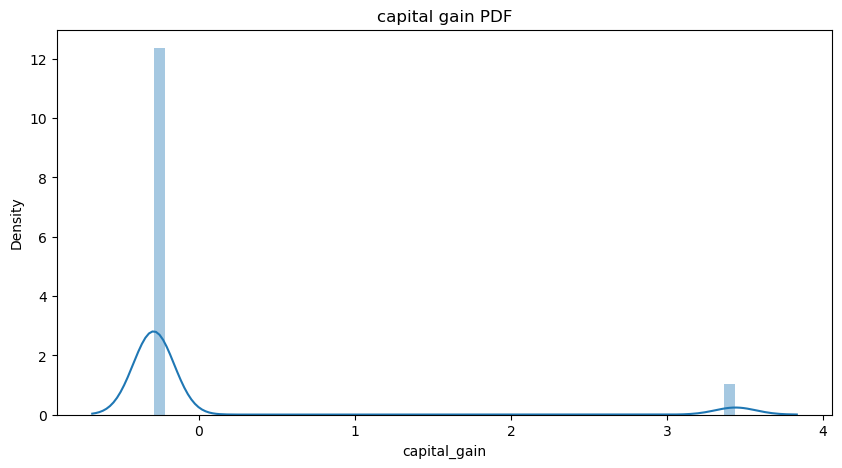

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(X_train_transformed['capital_gain'])
plt.title("capital gain PDF")
plt.show()

C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\2472043641.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['capital_gain'])
C:\Users\nitin\AppData\Local\Temp\ipykernel_7740\2472043641.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed['capital_gain'])


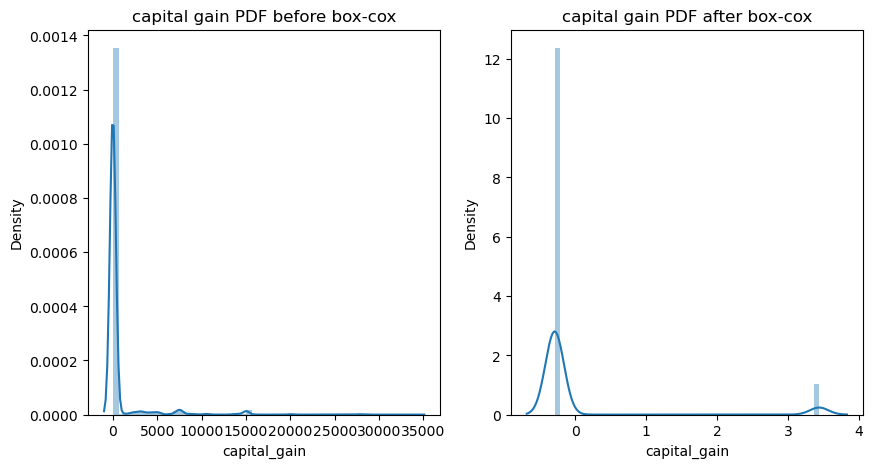

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(X_train['capital_gain'])
plt.title("capital gain PDF before box-cox")

plt.subplot(122)
sns.distplot(X_train_transformed['capital_gain'])
plt.title("capital gain PDF after box-cox")
plt.show()

# Apply a transformation (e.g., log transformation) to at least one skewed numerical feature & create 2 new features

LOG TRANSFORMATION: It  makes our data close to a normal distribution. This transformation is mostly applied to right-skewed data. So, let's appy log transformation to 'capital_gain' and 'capital_loss' which are having right-skewed data as we already visualise using boxplot. 

In [67]:
from sklearn.preprocessing import FunctionTransformer # import FunctionTransformer method which is having log transformation

In [68]:
trf = FunctionTransformer(func=np.log1p) # save in var. trf

In [69]:
trf

FunctionTransformer(func=<ufunc 'log1p'>)

In [70]:
capital_gain_transformed =trf.fit_transform(data['capital_gain']) # apply log transformation to capital_gain

In [71]:
capital_gain_transformed

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain, Length: 32378, dtype: float64

In [72]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [73]:
data['capital_gain_transformed'] = capital_gain_transformed # add a new column

In [74]:
data['capital_gain_transformed']

0        7.684784
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    9.617471
Name: capital_gain_transformed, Length: 32378, dtype: float64

In [75]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_transformed
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,7.684784
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.000000
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.000000
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.000000
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0.000000


right skewed data of capital_gain  transform to normal distribution and saved in new column 'capital_gain_transformed'

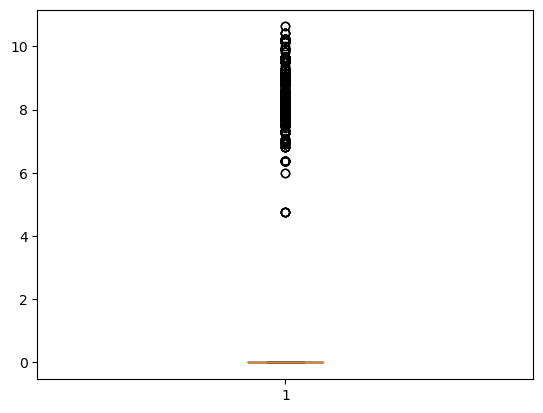

In [76]:
plt.boxplot(data['capital_gain_transformed'])
plt.show()

Let's plot them together

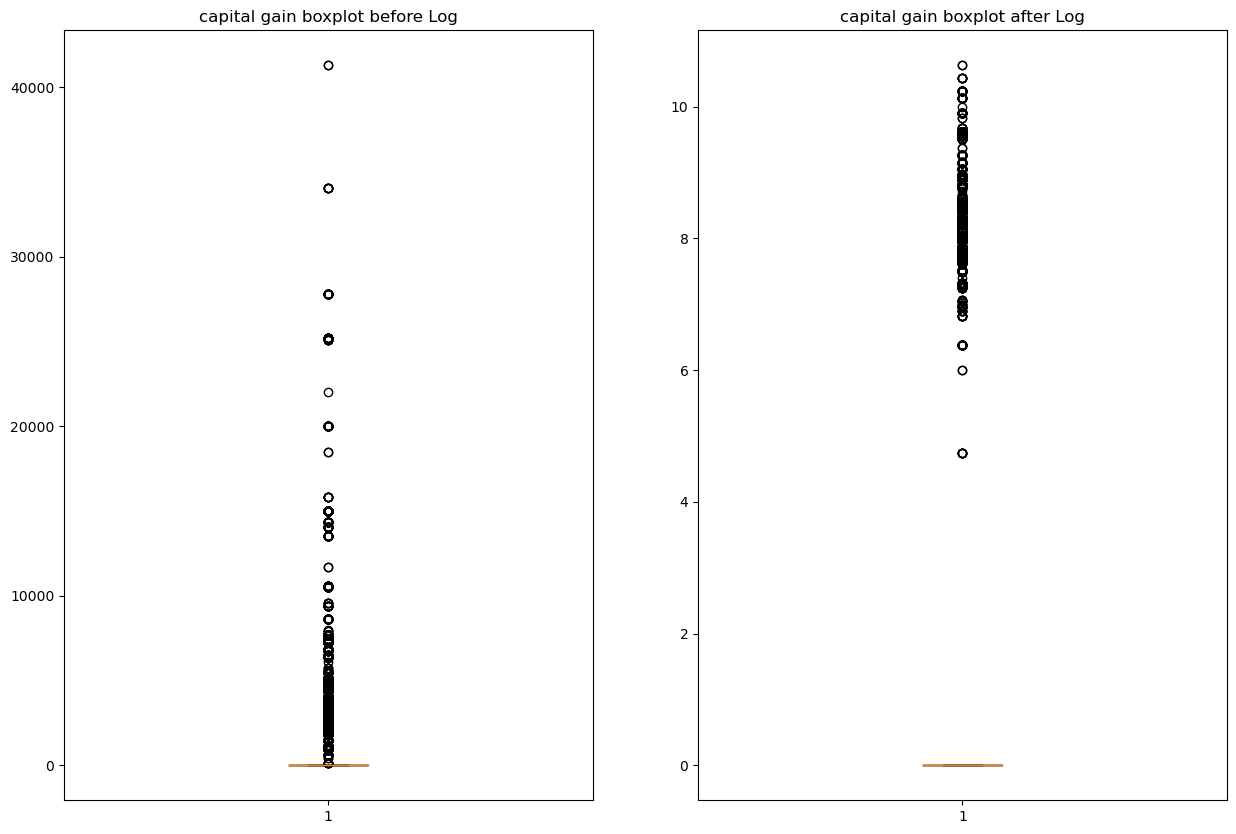

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.boxplot(data['capital_gain'])
plt.title('capital gain boxplot before Log')

plt.subplot(122)
plt.boxplot(data['capital_gain_transformed'])
plt.title('capital gain boxplot after Log')
plt.show()

if we compare boxplot of capital_gain with the boxplot of capital_gain_transformed, we can visualise that skewness has reduced and data has become more dense and very close to normal distribution

In [78]:
capital_loss_transformed =trf.fit_transform(data['capital_loss']) # apply log transformation to capital_loss

In [79]:
capital_loss_transformed

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32556    0.0
32557    0.0
32558    0.0
32559    0.0
32560    0.0
Name: capital_loss, Length: 32378, dtype: float64

In [80]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_transformed
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,7.684784
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.000000
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.000000
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.000000
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0.000000


In [81]:
data['capital_loss_transformed'] = capital_loss_transformed  # add a new column

In [82]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_transformed,capital_loss_transformed
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,7.684784,0.0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.000000,0.0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.000000,0.0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.000000,0.0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0.000000,0.0


right skewed data of capital_loss transform to normal distribution and saved in new column 'capital_loss_transformed'

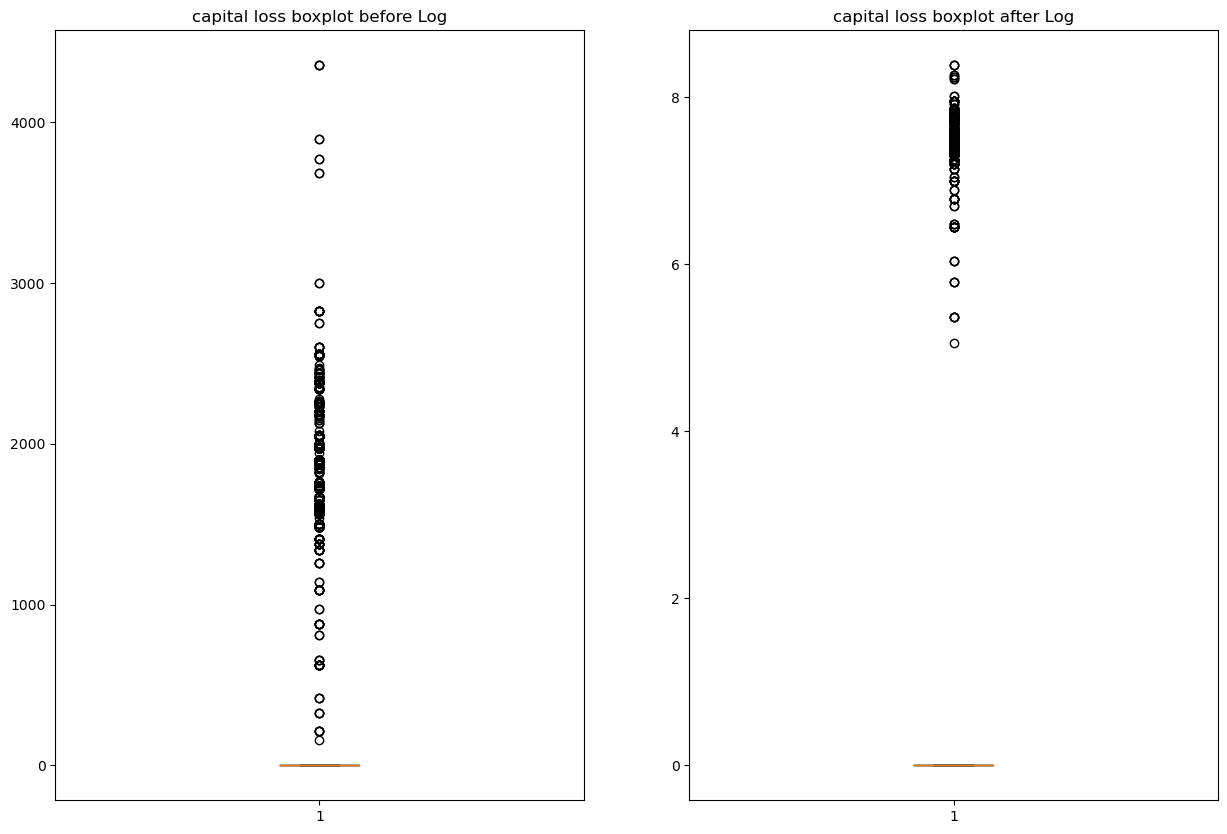

In [83]:
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.boxplot(data['capital_loss'])
plt.title('capital loss boxplot before Log')

plt.subplot(122)
plt.boxplot(data['capital_loss_transformed'])
plt.title('capital loss boxplot after Log')
plt.show()

if we compare boxplot of capital_loss with the boxplot of capital_loss_transformed, we can visualise that skewness has reduced and data has become more dense and very close to normal distribution

# Isolation Forest algorithm 

Isolation Forest is a technique for identifying anomalies in data

In [84]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_transformed,capital_loss_transformed
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,7.684784,0.0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.000000,0.0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.000000,0.0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.000000,0.0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0.000000,0.0


In [85]:
data = data.drop(['capital_gain_transformed'], axis =1)
data = data.drop(['capital_loss_transformed'], axis =1)

In [86]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [87]:
X = data.iloc[:,:-1]
Y = data['income']

In [88]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


In [89]:
Y


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32378, dtype: int32

In [90]:
from scipy import stats     
X = X.apply(stats.zscore)

In [91]:
X    # X should be a dataframe

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.033186,2.624822,-1.063216,-0.333340,1.143413,0.918943,-1.543425,-0.280429,0.393881,0.704520,0.617437,-0.2173,-0.031988,0.261325
1,0.839692,1.722084,-1.008326,-0.333340,1.143413,-0.407120,-0.788690,-0.902755,0.393881,0.704520,-0.231411,-0.2173,-2.221970,0.261325
2,-0.040133,-0.083393,0.245141,0.182881,-0.416435,-1.733183,-0.285533,-0.280429,0.393881,0.704520,-0.231411,-0.2173,-0.031988,0.261325
3,1.059648,-0.083393,0.425818,-2.398225,-1.196358,-0.407120,-0.285533,-0.902755,-1.961911,0.704520,-0.231411,-0.2173,-0.031988,0.261325
4,-0.773321,-0.083393,1.407943,-0.333340,1.143413,-0.407120,0.720780,2.208875,-1.961911,-1.419405,-0.231411,-0.2173,-0.031988,-5.350747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.846639,-0.083393,0.639703,-0.849561,0.753451,-0.407120,1.475515,2.208875,0.393881,-1.419405,-0.231411,-0.2173,-0.194209,0.261325
32557,0.106504,-0.083393,-0.335223,0.182881,-0.416435,-0.407120,-0.033955,-0.902755,0.393881,0.704520,-0.231411,-0.2173,-0.031988,0.261325
32558,1.426242,-0.083393,-0.358561,0.182881,-0.416435,2.245006,-1.543425,1.586549,0.393881,-1.419405,-0.231411,-0.2173,-0.031988,0.261325
32559,-1.213233,-0.083393,0.111056,0.182881,-0.416435,0.918943,-1.543425,0.964223,0.393881,0.704520,-0.231411,-0.2173,-1.654197,0.261325


In [92]:
len(data[data['income']==1])

7680

In [93]:
len(data[data['income']==0])

24698

In [94]:
outlier_fraction = len(data[data['income']==1])/ len(data[data['income']==0]) # Determine the fraction of outliers

In [95]:
outlier_fraction #  outlier fraction, representing the expected proportion of outliers in the dataset

0.31095635274111266

In [96]:
from sklearn.ensemble import IsolationForest # IsolationForest build on decision tree algorithm
model = IsolationForest(n_estimators=100, contamination= outlier_fraction,random_state=42)

In [97]:
model

IsolationForest(contamination=0.31095635274111266, random_state=42)

In [98]:
model.fit(X)   # train the model using dataframe X (Isolation Forest is unsupervised ML algorithm)

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.31095635274111266, random_state=42)

# Model evaluation


Now we will evaluate our model on the basis of how much accurately our model is separating the outliers or potential anomalies present in the dataset. So, here we will calculate the anomaly score from model’s decision boundary function then print Accuracy of it.

In [99]:
Y_pred = model.predict(X) #Predict anomaly score in each row of dataframe X

In [100]:
Y_pred # anomaly score is -1, 1 ......

array([-1,  1,  1, ...,  1,  1, -1])

An anomaly score of -1 assigns anomalies and 1 to normal points based on the contamination parameter (percentage of anomalies present in the data).

calculate anomaly in each row of dataframe X

In [101]:
scores_prediction = model.decision_function(X)   # anomaly/outlier present in each row of dataframe X

In [102]:
scores_prediction

array([-9.34201976e-05,  1.81763600e-02,  7.87076092e-02, ...,
        2.23180541e-03,  4.42239253e-02, -9.03437624e-02])

In [103]:
scores_prediction.shape

(32378,)

In [104]:
data['anomaly'] = scores_prediction   # create a new column

In [105]:
data['anomaly']

0       -0.000093
1        0.018176
2        0.078708
3        0.007120
4       -0.125898
           ...   
32556   -0.002983
32557    0.107262
32558    0.002232
32559    0.044224
32560   -0.090344
Name: anomaly, Length: 32378, dtype: float64

In [106]:
data['anomaly score'] = Y_pred   # create a new column

In [107]:
data['anomaly score']

0       -1
1        1
2        1
3        1
4       -1
        ..
32556   -1
32557    1
32558    1
32559    1
32560   -1
Name: anomaly score, Length: 32378, dtype: int32

In [108]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,anomaly,anomaly score
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,-0.000093,-1
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.018176,1
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.078708,1
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.007120,1
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,-0.125898,-1


Note: To find accuracy score, we need Y and Y_pred. Actual Y has 0 & 1 but predicted Y has -1 & 1. Therefore, in Y_pred  replace -1 with 1 and 1 with 0

In [109]:
Y_pred[Y_pred == 1] = 0   # replace 1 with 0
Y_pred[Y_pred == -1] = 1    # replace -1 with 1

In [110]:
Y_pred # Now, 1 represent anomaly and 0 represent normal point

array([1, 0, 0, ..., 0, 0, 1])

In [111]:
from sklearn.metrics import accuracy_score # Print the accuracy in separating outliers or anomalies
print("Accuracy in finding anomaly:",accuracy_score(Y,Y_pred))  #So, we have achieved above 62% of accuracy.

Accuracy in finding anomaly: 0.6203595033664834


In [112]:
print(model.get_params())  # hyper parameters

{'bootstrap': False, 'contamination': 0.31095635274111266, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 42, 'verbose': 0, 'warm_start': False}


# Comparative visualization

Now we will plot the normal vs. anomalous instances of any feature of the dataset. Here we will plot the ‘capital_gain’ feature of the dataset but you can just change the name of the feature to visualize that feature’s results.

In [113]:
data['predicted_class'] = Y_pred  # create a new column

In [114]:
data['predicted_class'] 

0        1
1        0
2        0
3        0
4        1
        ..
32556    1
32557    0
32558    0
32559    0
32560    1
Name: predicted_class, Length: 32378, dtype: int32

In [115]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,anomaly,anomaly score,predicted_class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,-0.000093,-1,1
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.018176,1,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.078708,1,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.007120,1,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,-0.125898,-1,1


<AxesSubplot:ylabel='capital_gain'>

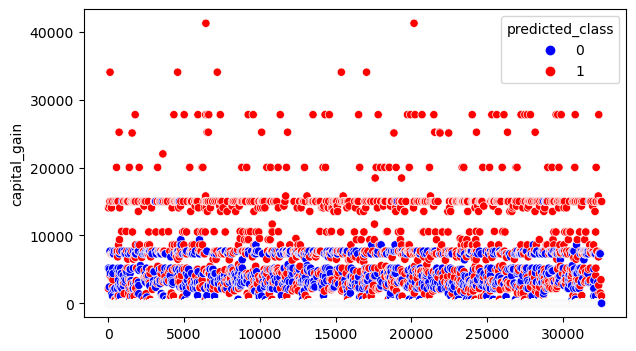

In [116]:
plt.figure(figsize=(7, 4))  
sns.scatterplot(x= data.index, y= data['capital_gain'], hue= data['predicted_class'], palette= {0: 'blue', 1: 'red'})

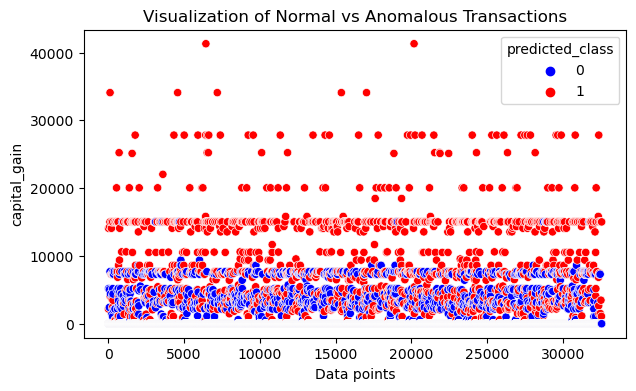

In [117]:
plt.figure(figsize=(7, 4))  
sns.scatterplot(x= data.index, y= data['capital_gain'], hue= data['predicted_class'], palette= {0: 'blue', 1: 'red'})
plt.title('Visualization of Normal vs Anomalous Transactions')
plt.xlabel('Data points')
plt.show()           

From the above plot, we can clearly see that the normal instances and anomalous instances are separated in well manner with little overlap (with accuracy of 62%)and for this purpose only, we use isolation forest (0 means normal points)

Conclusion:

We can conclude that Isolation Forest emerges as a powerful anomaly detection algorithm with notable advantages such as efficiency, scalability, and robustness to outliers.

# Discuss how outliers can affect model performance.

An outlier is a data point that significantly deviates from the rest of the data. It can be either much higher or much lower than the other data points, and its presence can have a significant impact on the results of machine learning algorithms.

Outliers exist in data due to various reasons such as measurement errors, unusual events, or rare occurrences. They disrupt the normal pattern of the dataset, standing out as unusual values and hence can significantly impact the model's performance in making future predictions

# Predictive Power Score

The PPS is a score that can detect linear or non-linear relationships between two columns. The score ranges from 0 (no predictive power) to 1 (perfect predictive power). It can be used as an alternative to the correlation (matrix).

The score should be 0 if there is no relationship i.e. no correlation and the score should be 1 if there is a perfect relationship

In [118]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,anomaly,anomaly score,predicted_class
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,-0.000093,-1,1
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.018176,1,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.078708,1,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.007120,1,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,-0.125898,-1,1


In [119]:
data = data.drop(['anomaly'], axis =1)
data = data.drop(['anomaly score'], axis =1)
data = data.drop(['predicted_class'], axis =1)


In [120]:
 data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [121]:
#! pip install ppscore

In [122]:
import ppscore as pps

Based on the dataframe we can calculate the PPS of x predicting y. For ex: we can calculate the PPS of capital_gain in predicting income

In [123]:
pps.score(data, "capital_gain", "income")

{'x': 'capital_gain',
 'y': 'income',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.2324,
 'model_score': 0.3012797922006515,
 'model': DecisionTreeRegressor()}

We can calculate the PPS of all the predictors in the dataframe against a target y:

In [124]:
predictors_df = pps.predictors(data, "income")  # plot PPS predictors
predictors_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,income,0,regression,True,mean absolute error,0.2324,0.322291,DecisionTreeRegressor()
1,workclass,income,0,regression,True,mean absolute error,0.2324,0.347210,DecisionTreeRegressor()
2,fnlwgt,income,0,regression,True,mean absolute error,0.2324,0.342067,DecisionTreeRegressor()
3,education,income,0,regression,True,mean absolute error,0.2324,0.311458,DecisionTreeRegressor()
4,education_num,income,0,regression,True,mean absolute error,0.2324,0.311458,DecisionTreeRegressor()
5,marital_status,income,0,regression,True,mean absolute error,0.2324,0.292594,DecisionTreeRegressor()
6,occupation,income,0,regression,True,mean absolute error,0.2324,0.322737,DecisionTreeRegressor()
7,relationship,income,0,regression,True,mean absolute error,0.2324,0.290449,DecisionTreeRegressor()
8,race,income,0,regression,True,mean absolute error,0.2324,0.354217,DecisionTreeRegressor()
9,sex,income,0,regression,True,mean absolute error,0.2324,0.343652,DecisionTreeRegressor()


# PPS matrix

# Apply the PPS (Predictive Power Score) to find and discuss the relationships between features.

In [125]:
matrix_df = pps.matrix(data) # calculate PPS matrix (it finds the correlation between all the features using PPS score)
matrix_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.5436,0.633130,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,76217.4818,77587.795399,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7866,2.795445,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.9402,1.964470,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,income,capital_gain,0.0,regression,True,mean absolute error,589.4620,983.389422,DecisionTreeRegressor()
221,income,capital_loss,0.0,regression,True,mean absolute error,87.2992,161.697702,DecisionTreeRegressor()
222,income,hours_per_week,0.0,regression,True,mean absolute error,7.3044,7.774153,DecisionTreeRegressor()
223,income,native_country,0.0,regression,True,mean absolute error,1.4620,2.693795,DecisionTreeRegressor()


1 means linear relationship i.e perfect predictive power 

In [126]:
matrix_df = matrix_df[['x', 'y', 'ppscore']]  # define new matrix_df

In [127]:
matrix_df

,x,y,ppscore
0,age,age,1.0
1,age,workclass,0.0
2,age,fnlwgt,0.0
3,age,education,0.0
4,age,education_num,0.0
...,...,...,...
220,income,capital_gain,0.0
221,income,capital_loss,0.0
222,income,hours_per_week,0.0
223,income,native_country,0.0


In [128]:
matrix_df = matrix_df.pivot(columns='x', index='y', values='ppscore')  # PPS matrix is calculated

In [129]:
matrix_df

x,age,capital_gain,capital_loss,education,education_num,fnlwgt,hours_per_week,income,marital_status,native_country,occupation,race,relationship,sex,workclass
y,,,,,,,,,,,,,,,
age,1.000000,0.011696,0.0,0.024183,0.024183,0.0,0.005314,0.033626,0.206794,0.0,0.013127,0.000000,0.142513,0.000000,0.02063
capital_gain,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
capital_loss,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
education,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
education_num,0.000000,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.032358,0.000000,0.0,0.077124,0.000000,0.000000,0.000000,0.00000
fnlwgt,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.002122,0.000000,0.000000,0.00000
hours_per_week,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
income,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000
marital_status,0.157274,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.287984,0.000000,0.00000


age is the most important feature in deciding income of a person with maximum PPS score of 0.033 and then education_num is the 2nd most important feature (PPS score = 0.032)

# compare the result of PPS matrix with correlation matrix

<AxesSubplot:>

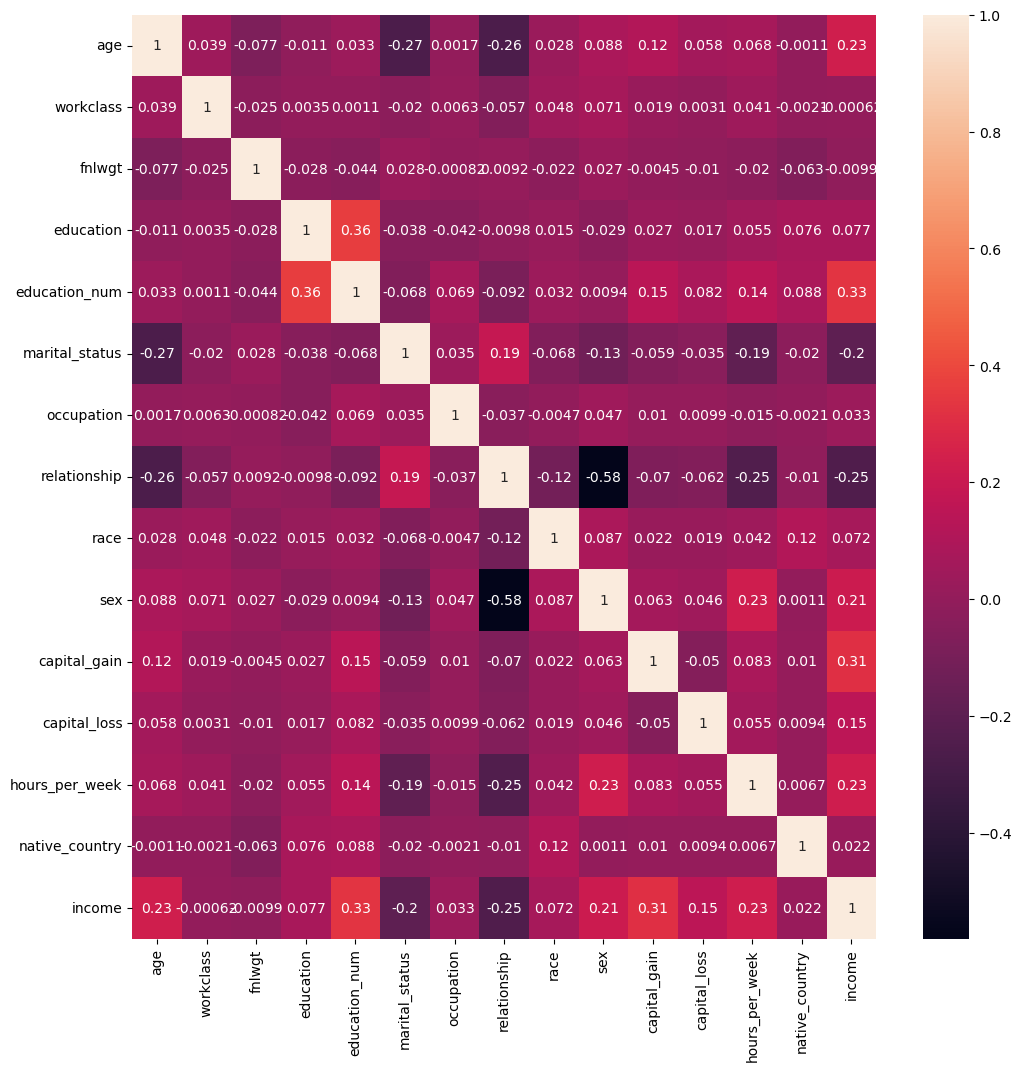

In [130]:
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(data.corr(), annot=True)

education_num is the most important feature in deciding income with maximum correlation of 0.33. However, as per PPS matrix, education_num is 2nd most important feature. 

Conclusion: education_num is very vital parameter in deciding the income of a person. 